In [52]:
import pandas as pd
import numpy as np

In [50]:
transfers = pd.read_csv('merged_cleaned_data.csv')

In [51]:
transfers.head()

,club,name,age,nationality,position,short_pos,market_value,dealing_club,dealing_country,fee,movement,window,league,season,is_loan,loan_status
0,Arsenal FC,Alex Oxlade-Chamberlain,17.0,England,Central Midfield,CM,2500000.0,Southampton,England,13800000,in,summer,Premier League,2011,False,Not Applicable
1,Arsenal FC,Per Mertesacker,26.0,Germany,Centre-Back,CB,12500000.0,Werder Bremen,Germany,11300000,in,summer,Premier League,2011,False,Not Applicable
2,Arsenal FC,André Santos,28.0,Brazil,Attacking Midfield,AM,8500000.0,Fenerbahce,Turkey,7000000,in,summer,Premier League,2011,False,Not Applicable
3,Arsenal FC,Chu-young Park,26.0,"Korea, South",Centre-Forward,CF,7000000.0,Monaco,France,6500000,in,summer,Premier League,2011,False,Not Applicable
4,Arsenal FC,Carl Jenkinson,19.0,England,Right-Back,RB,50000.0,Charlton,England,1130000,in,summer,Premier League,2011,False,Not Applicable


In [53]:
transfers['club'].unique()

array(['Arsenal FC', 'Aston Villa', 'Blackburn Rovers',
       'Bolton Wanderers', 'Chelsea FC', 'Everton FC', 'Fulham FC',
       'Liverpool FC', 'Manchester City', 'Manchester United',
       'Newcastle United', 'Norwich City', 'Queens Park Rangers',
       'Stoke City', 'Sunderland AFC', 'Swansea City',
       'Tottenham Hotspur', 'West Bromwich Albion', 'Wigan Athletic',
       'Wolverhampton Wanderers', 'Reading FC', 'Southampton FC',
       'West Ham United', 'Cardiff City', 'Crystal Palace', 'Hull City',
       'Burnley FC', 'Leicester City', 'AFC Bournemouth', 'Watford FC',
       'Middlesbrough FC', 'Brighton & Hove Albion', 'Huddersfield Town',
       'Sheffield United', 'Leeds United', 'Brentford FC',
       'Athletic Bilbao', 'Atlético Madrid', 'CA Osasuna', 'FC Barcelona',
       'Getafe CF', 'Granada CF', 'Levante UD', 'Málaga CF',
       'RCD Espanyol Barcelona', 'RCD Mallorca', 'Racing Santander',
       'Rayo Vallecano', 'Real Betis Balompié', 'Real Madrid',
       'Re

In [54]:
transfers.columns

Index(['club', 'name', 'age', 'nationality', 'position', 'short_pos',
       'market_value', 'dealing_club', 'dealing_country', 'fee', 'movement',
       'window', 'league', 'season', 'is_loan', 'loan_status'],
      dtype='object')

In [55]:
transfers.isnull().sum()

club               0
name               0
age                0
nationality        0
position           0
short_pos          0
market_value       0
dealing_club       0
dealing_country    0
fee                0
movement           0
window             0
league             0
season             0
is_loan            0
loan_status        0
dtype: int64

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
transfers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15528 entries, 0 to 15527
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   club             15528 non-null  object  
 1   name             15528 non-null  object  
 2   age              15528 non-null  float64 
 3   nationality      15528 non-null  object  
 4   position         15528 non-null  object  
 5   short_pos        15528 non-null  object  
 6   market_value     15528 non-null  float64 
 7   dealing_club     15528 non-null  object  
 8   dealing_country  15528 non-null  object  
 9   fee              15528 non-null  int64   
 10  movement         15528 non-null  object  
 11  window           15528 non-null  object  
 12  league           15528 non-null  object  
 13  season           15528 non-null  category
 14  is_loan          15528 non-null  bool    
 15  loan_status      15528 non-null  object  
dtypes: bool(1), category(1), float64(2), int

In [58]:
transfers.shape

(15528, 16)

In [59]:
transfers['season'] = pd.Categorical(transfers['season'], categories=transfers['season'].unique(), ordered=True)

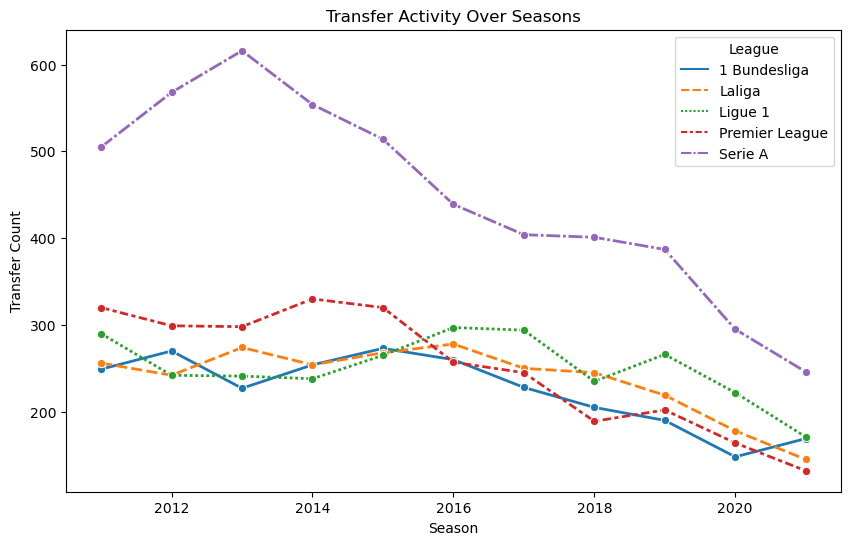

In [62]:
pivot_df = transfers.pivot_table(index='season', columns='league', values='movement', aggfunc='count', fill_value=0)

# Plotting the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=pivot_df, marker='o', linewidth=2)
plt.title('Transfer Activity Over Seasons')
plt.xlabel('Season')
plt.ylabel('Transfer Count')
plt.legend(title='League', loc='upper right')

plt.show()

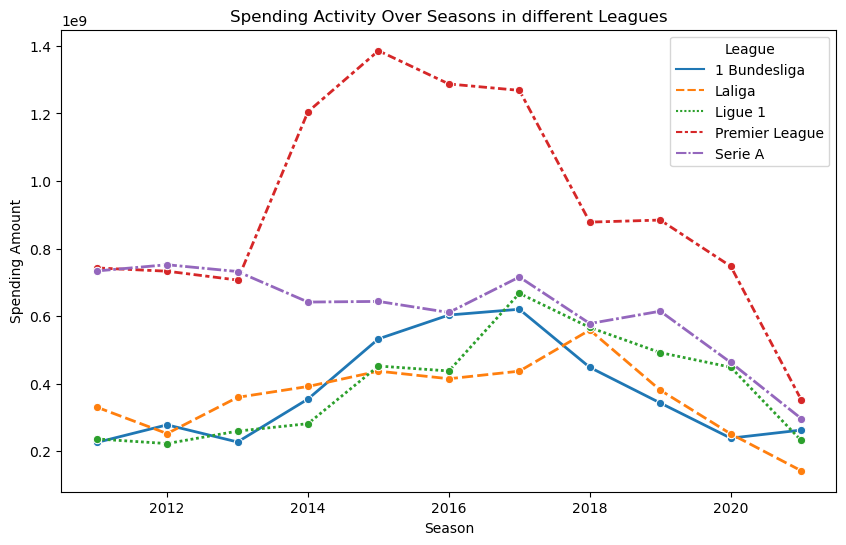

In [88]:
pivot_spend = transfers.pivot_table(index='season', columns='league', values='fee', aggfunc='sum', fill_value=0)

# Plotting the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=pivot_spend, marker='o', linewidth=2)
plt.title('Spending Activity Over Seasons in different Leagues')
plt.xlabel('Season')
plt.ylabel('Spending Amount')
plt.legend(title='League', loc='upper right')

plt.show()

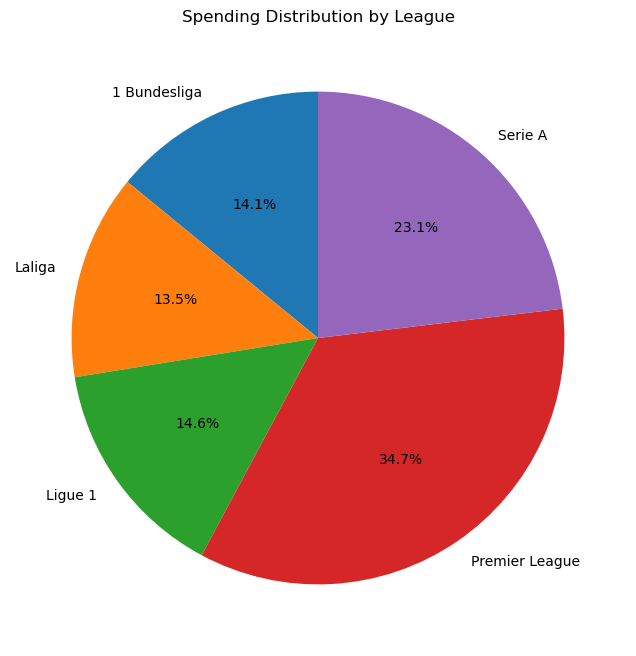

In [89]:
# Group by 'league' and calculate total spending
spending_by_league = transfers.groupby('league')['fee'].sum().reset_index()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(spending_by_league['fee'], labels=spending_by_league['league'], autopct='%1.1f%%', startangle=90)
plt.title('Spending Distribution by League')
plt.show()

In [90]:
spending_by_league

,league,fee
0,1 Bundesliga,4131740360
1,Laliga,3953315249
2,Ligue 1,4293730329
3,Premier League,10191383288
4,Serie A,6779973886


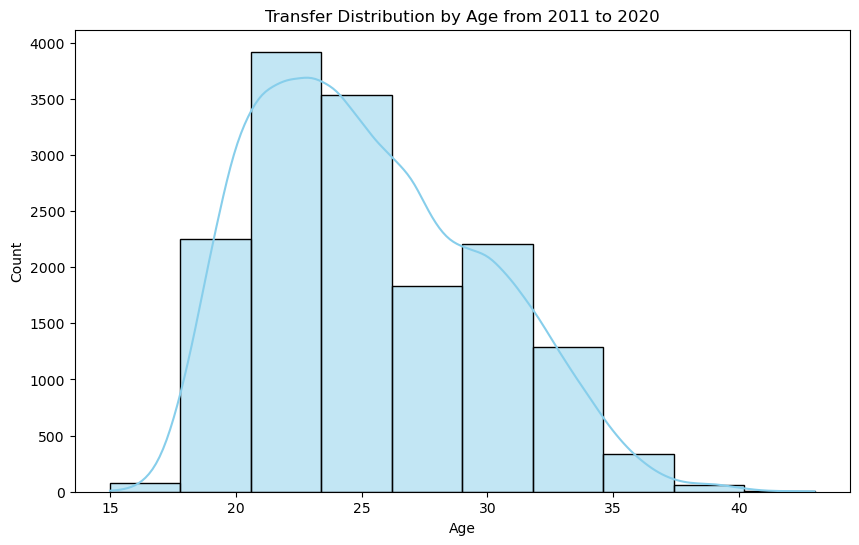

In [65]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(transfers['age'], bins=10, kde=True, color='skyblue', edgecolor='black')
plt.title('Transfer Distribution by Age from 2011 to 2020')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

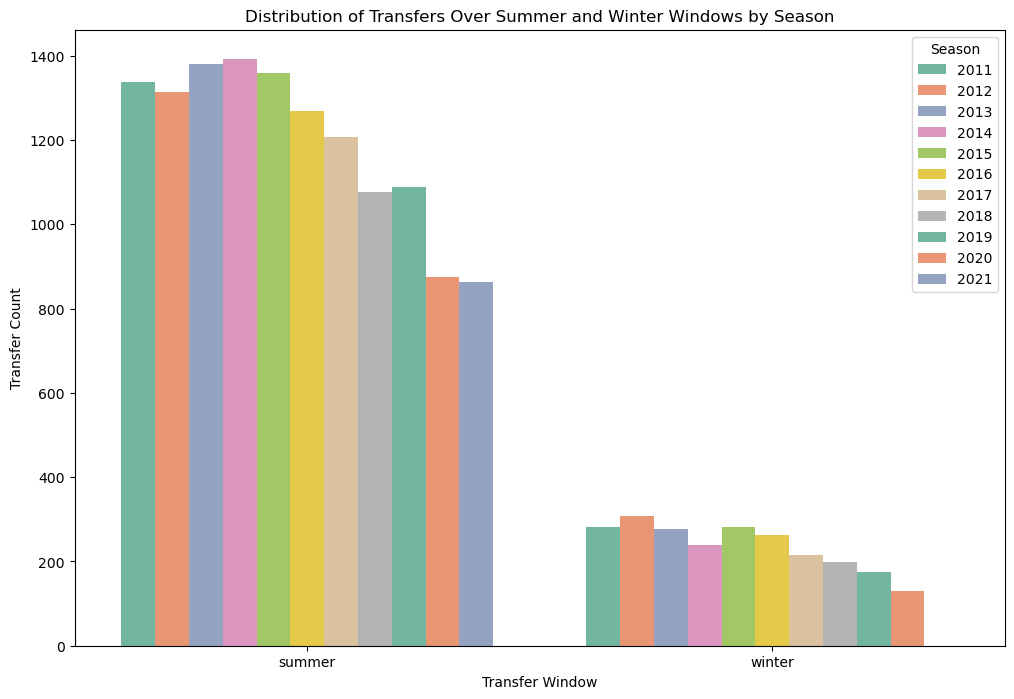

In [66]:
# Count the number of transfers in each season, window, and movement
counts = transfers.groupby(['season', 'window']).size().reset_index(name='transfer_count')

# Plotting the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='window', y='transfer_count', hue='season', data=counts, palette='Set2')
plt.title('Distribution of Transfers Over Summer and Winter Windows by Season')
plt.xlabel('Transfer Window')
plt.ylabel('Transfer Count')
plt.legend(title='Season', loc='upper right')
plt.show()

In [67]:
counts

,season,window,transfer_count
0,2011,summer,1338
1,2011,winter,282
2,2012,summer,1314
3,2012,winter,307
4,2013,summer,1380
5,2013,winter,276
6,2014,summer,1392
7,2014,winter,238
8,2015,summer,1358
9,2015,winter,282


In [68]:
counts['transfer_count'].sum()

15528

In [76]:
import plotly.express as px

In [75]:
# Group by both 'club' and 'league' columns
new_club_counts = transfers.groupby(['club', 'league']).size().reset_index(name='transfer_count')

# Plotting the treemap with faceting based on 'league'
fig = px.treemap(new_club_counts, path=['league', 'club'], values='transfer_count',
                 title='Top Dealing Clubs by League and Clubs',
                 color='transfer_count', color_continuous_scale='Viridis')

fig.update_layout(margin=dict(l=0, r=0, b=0, t=40))
fig.show()

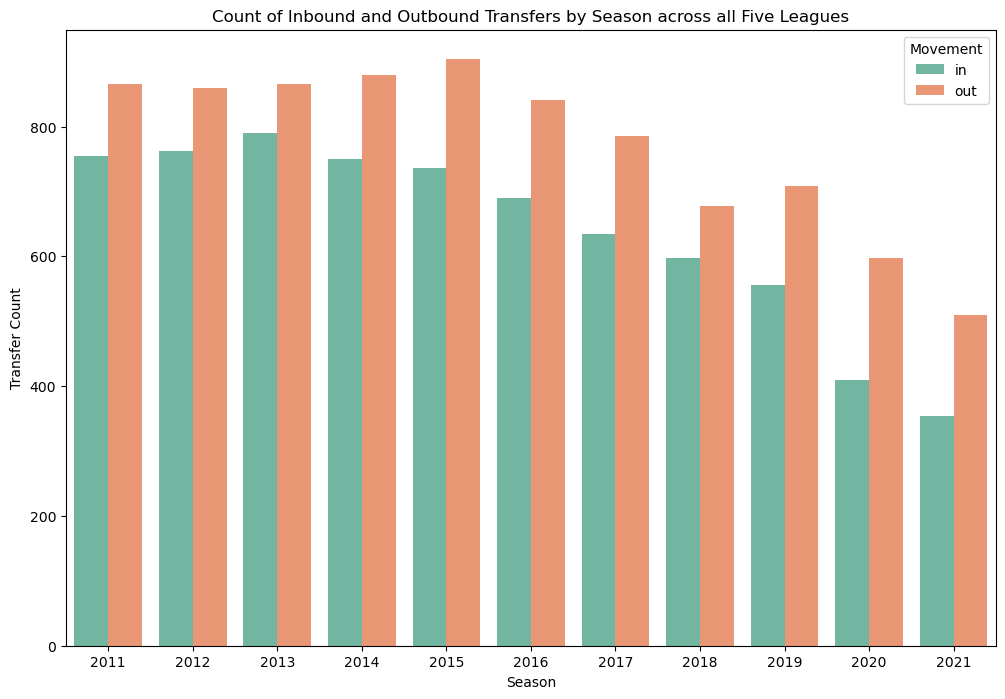

In [82]:
# Count the number of transfers for each season and movement
movement_count = transfers.groupby(['season', 'movement']).size().reset_index(name='transfer_count')

# Plotting the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='season', y='transfer_count', hue='movement', data=movement_count, palette='Set2')
plt.title('Count of Inbound and Outbound Transfers by Season across all Five Leagues')
plt.xlabel('Season')
plt.ylabel('Transfer Count')
plt.legend(title='Movement', loc='upper right')
plt.show()

In [96]:
# Create an interactive bar chart with a dropdown list
fig = px.bar(transfers, x='season', y='fee', animation_frame='league',
             labels={'fee': 'Total Spending'},
             title='Spending Trends by Club and Season',
             template='plotly_dark')

fig.show()